In [64]:
from qiskit import QuantumRegister, ClassicalRegister, QuantumCircuit, Aer, execute
from math import pi, cos, sin
from random import randrange
import matplotlib.pyplot as plt

In [65]:
qreg = QuantumRegister(3, "qubit")
creg = ClassicalRegister(3, "bit")
circuit = QuantumCircuit(qreg, creg)

In [66]:
r = randrange(100)
theta = 2*pi*(r/100)
print("the picked angle is",r*3.6,"degrees and",theta,"radians")

the picked angle is 324.0 degrees and 5.654866776461628 radians


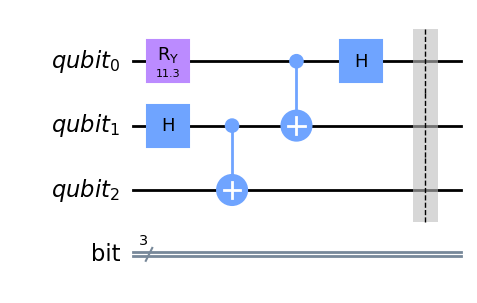

In [67]:
circuit.ry(2*theta, qreg[0]) # ssend stae of q[2] to Bob

# creating an entangled pair
circuit.h(qreg[1])
circuit.cx(qreg[1], qreg[2]) # cnot

# cnot by Alice on q[0] is the control
circuit.cx(qreg[0], qreg[1])

# hadamard by Alice on q[0]
circuit.h(qreg[0])

circuit.barrier()

circuit.draw(output="mpl", style="clifford")

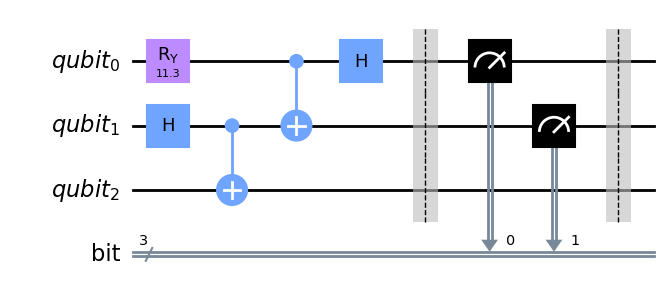

In [68]:
# measurement done by Alice
circuit.measure(qreg[0], creg[0])
circuit.measure(qreg[1], creg[1])

circuit.barrier()

circuit.draw(output="mpl", style="clifford")

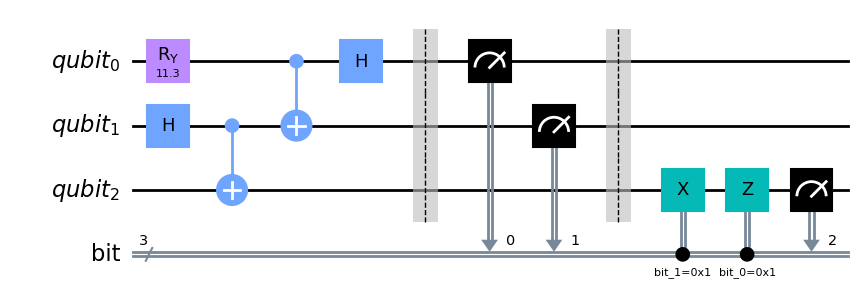

In [69]:
# post-processing by Bob
circuit.x(qreg[2]).c_if(creg[1], 1)
circuit.z(qreg[2]).c_if(creg[0], 1)

circuit.measure(qreg[2], creg[2])

circuit.draw(output="mpl", style="clifford")

In [70]:
from qiskit.visualization import plot_histogram

job = execute(circuit, backend = Aer.get_backend('qasm_simulator'), shots=50000)
counts = job.result().get_counts()
print(counts)

{'100': 4356, '001': 8244, '110': 4246, '011': 8123, '111': 4375, '101': 4331, '000': 8169, '010': 8156}


{'0': 0, '1': 50000}


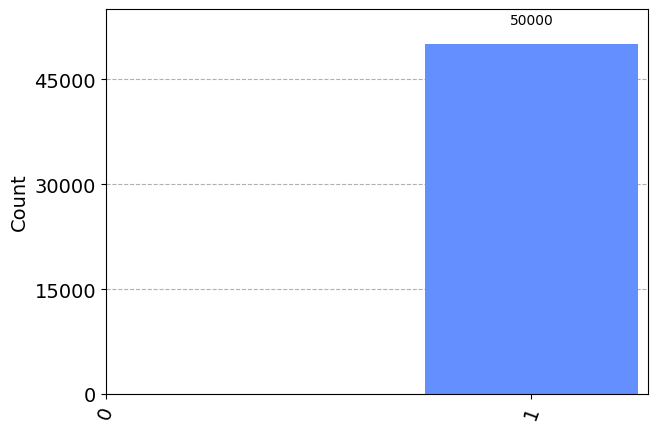

In [71]:
count_bit_0 = {}
count_bit_1 = {}

for state, count in counts.items():
    bits = state.split()
    third_bit = bits[0]

    if third_bit == "0":
        count_bit_0[state] = count
    else: 
        count_bit_1[state] = count

total_0 = sum(count_bit_0.values())
total_1 = sum(count_bit_1.values())

res_count = {'0': total_0, '1': total_1}
print(res_count)
plot_histogram(res_count)